# Tugas 1

#### NAMA     : AHMED FATHIR SYAFAAT
#### KELAS    : TI - 3H
#### NIM      : 2241720083



Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Unduh Dataset CIFAR
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Buat generator untuk augmentasi data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


In [4]:
# Buat Model CNN
model = models.Sequential()

In [ ]:
# Layer Konvolusi 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 

# Layer Konvolusi 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  

# Layer Konvolusi 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))  

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

c:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile Model CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Training Model dengan data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50, 
                    validation_data=(test_images, test_labels))

c:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 111ms/step - accuracy: 0.2209 - loss: 2.8360 - val_accuracy: 0.4628 - val_loss: 1.5141
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.3610 - loss: 1.9831 - val_accuracy: 0.4713 - val_loss: 1.4820
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.4103 - loss: 1.7201 - val_accuracy: 0.5142 - val_loss: 1.3632
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.4571 - loss: 1.5617 - val_accuracy: 0.5101 - val_loss: 1.4224
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.4957 - loss: 1.4384 - val_accuracy: 0.5375 - val_loss: 1.3522
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.5301 - loss: 1.3287 - val_accuracy: 0.5751 - val_loss: 1.2393
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.5637 - loss: 1.2274 - val_accuracy: 0.6185 - val_loss: 1.1074
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.5847 - loss

313/313 - 4s - 13ms/step - accuracy: 0.8188 - loss: 0.5408


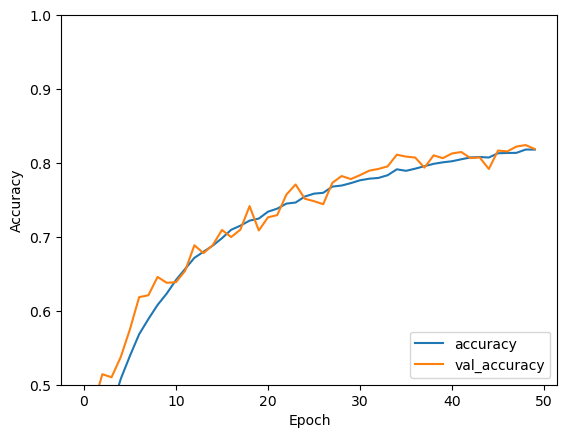

In [ ]:
# Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [9]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8187999725341797
